In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import scipy.stats as sts
#from scipy.stats import linregress
from pprint import pprint
#import warnings
#warnings.filterwarnings('ignore')
#import ipywidgets as widgets
%matplotlib inline


In [2]:
#%pip install citipy

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

Generate Cities List

In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


651

In [5]:
##cityurl = "http://api.openweathermap.org/data/2.5/weather?"
#city = "london" 
#Parameter for the API call
##api_key_weather = "ce3f01dd4d23d07b4cfb5ca82f3ea6e5"
##parameters={'appid':api_key_weather, "units":"imperial"}
##results = []
#contentType ='json'
#loop through the list of cities and perform a request for weather data for each city
##for city in cities:
    ##parameters['q']=city
    ##response = requests.get(cityurl, params=parameters)
    ##weatherjson=response.json()
    ##if weatherjson['cod']==200:
        ##results.append(response)
    ##else:
        ##if weatherjson['cod']==404:
            ##print('Data not available')

##time.sleep(5)
#display(results)

Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [6]:
#set up list to hold response info
results = []
counter = 0
cityurl = "http://api.openweathermap.org/data/2.5/weather?"
#city = "london" 
api_key_weather = "ce3f01dd4d23d07b4cfb5ca82f3ea6e5"
parameters={'appid':api_key_weather, "units":"imperial"}


for city in cities:
    parameters['q']=city
    response = requests.get(cityurl, params=parameters).json()

    #try/except statement to handle errors when city is not found on openweather site
    try:
        #create dictionary
        city_data = {
            "City": response['name'],
            "Lat": response['coord']['lat'],
            "Lng": response['coord']['lon'],
            "Max Temp": response['main']['temp_max'],
            "Humidity": response['main']['humidity'],
            "Cloudiness": response['clouds']['all'],
            "Wind Speed": response['wind']['speed'],
            "Country": response['sys']['country'],
            "Date": response['dt']
        }
        results.append(city_data)
        counter = counter + 1
        print(f"{counter} City Name: {response['name']} / ID:{response['id']}")
    except:
        print("Missing city | " + city)


1 City Name: Ushuaia / ID:3833367
2 City Name: Hong Kong / ID:1819729
3 City Name: Rawson / ID:3839307
4 City Name: Bathsheba / ID:3374083
5 City Name: Alamor / ID:3659544
6 City Name: Talnakh / ID:1490256
7 City Name: Bluff / ID:2206939
8 City Name: Vardø / ID:777019
9 City Name: Clyde River / ID:5924351
Missing city | louisbourg
10 City Name: Hilo / ID:5855927
11 City Name: Sand Springs / ID:4550659
12 City Name: Ahipara / ID:2194098
13 City Name: Chara / ID:2025630
14 City Name: Usinsk / ID:863061
15 City Name: Puerto Ayora / ID:3652764
16 City Name: Zhob / ID:1162105
17 City Name: Tilichiki / ID:2120591
18 City Name: Santiago / ID:3871336
19 City Name: Severo-Kuril'sk / ID:2121385
20 City Name: Sindgi / ID:1256214
21 City Name: Los Llanos de Aridane / ID:2514651
22 City Name: Sovetskiy / ID:1491230
23 City Name: Flinders / ID:6255012
24 City Name: Bakchar / ID:1511057
25 City Name: Oodweyne / ID:53372
26 City Name: Kavaratti / ID:1267390
27 City Name: Nome / ID:5870133
28 City Name

207 City Name: Guilin / ID:1809498
208 City Name: Kulhudhuffushi / ID:1337613
209 City Name: Pec / ID:787157
210 City Name: Piskivka / ID:697489
211 City Name: Kuruman / ID:986134
212 City Name: Saskylakh / ID:2017155
213 City Name: Malaya Serdoba / ID:531383
214 City Name: Hofn / ID:2630299
215 City Name: Arraial do Cabo / ID:3471451
216 City Name: Novikovo / ID:487928
217 City Name: Santa Ana / ID:5392900
218 City Name: Nālūt / ID:2214432
219 City Name: Meulaboh / ID:1214488
220 City Name: Melipilla / ID:3880107
221 City Name: Belmonte / ID:3470137
222 City Name: Gīdam / ID:1271215
223 City Name: Umm Kaddadah / ID:364933
224 City Name: Río Gallegos / ID:3838859
225 City Name: Arlit / ID:2447513
226 City Name: Ilulissat / ID:3423146
227 City Name: Vostok / ID:2013279
228 City Name: Iquitos / ID:3696183
229 City Name: Tasiilaq / ID:3424607
230 City Name: Inongo / ID:2315417
231 City Name: Narsaq / ID:3421719
232 City Name: Quipot / ID:1691995
233 City Name: Bahía Honda / ID:3567995
234

417 City Name: Nola / ID:6541905
418 City Name: Bozdar Wada / ID:1182295
419 City Name: Taywarah / ID:1122464
420 City Name: Lázaro Cárdenas / ID:4026082
421 City Name: Luleå / ID:604490
422 City Name: Cape Coast / ID:2302357
423 City Name: Gien / ID:3016097
424 City Name: Leh / ID:1264976
425 City Name: Penzance / ID:2640377
426 City Name: Ituango / ID:3680434
427 City Name: Wilmington / ID:4499379
428 City Name: Morris / ID:5101405
429 City Name: Saryozek / ID:1519580
430 City Name: Itarema / ID:3393692
Missing city | tsihombe
431 City Name: Alzamay / ID:1511709
432 City Name: Salalah / ID:286621
433 City Name: Mossamedes / ID:3347019
434 City Name: San Patricio / ID:4726521
435 City Name: Hamilton / ID:4513583
436 City Name: Rengo / ID:3873441
437 City Name: Ayan / ID:2027316
438 City Name: Reno / ID:5511077
439 City Name: Panabá / ID:3521972
440 City Name: Ilhabela / ID:3461425
441 City Name: Kutum / ID:371745
442 City Name: Adrar / ID:2381972
443 City Name: Bubaque / ID:2374583
44

Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame


In [16]:
# # Create a DataFrame.
city_df = pd.DataFrame(results)
city_df
# write to output file
city_df.to_csv("weatherhome.csv", index=False)                      

In [17]:
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,50.00,93,40,2.30,AR,1613628061
1,Hong Kong,22.2855,114.1577,69.01,58,33,1.99,HK,1613628061
2,Rawson,-43.3002,-65.1023,64.92,54,15,6.40,AR,1613628062
3,Bathsheba,13.2167,-59.5167,77.00,65,20,25.32,BB,1613628065
4,Alamor,-4.0181,-80.0197,57.42,100,71,2.89,EC,1613628065
...,...,...,...,...,...,...,...,...,...
597,Komsomolets,53.7453,62.0708,4.12,93,100,18.34,KZ,1613628141
598,Izhma,65.0083,53.9113,-13.94,86,100,7.63,RU,1613628141
599,Goderich,43.7501,-81.7165,8.60,85,100,3.44,CA,1613628141
600,Vol'sk,52.0333,47.3833,-5.69,85,0,2.30,RU,1613628141


The scatter plot shows latitude vs cloudiness


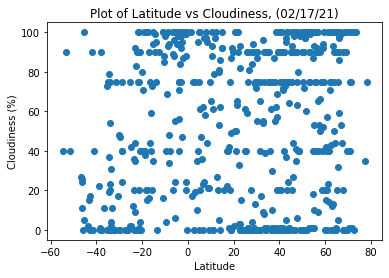

In [18]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"])
plt.title('Plot of Latitude vs Cloudiness, (02/17/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print("The scatter plot shows latitude vs cloudiness")

The scatter plot shows latitude vs Maximun Temperature


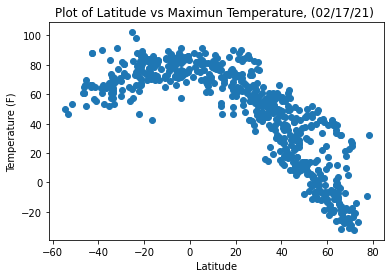

In [19]:
plt.scatter(city_df["Lat"], city_df["Max Temp"])
plt.title('Plot of Latitude vs Maximun Temperature, (02/17/21) ')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print("The scatter plot shows latitude vs Maximun Temperature")

The scatter plot shows Latitude vs Humidity


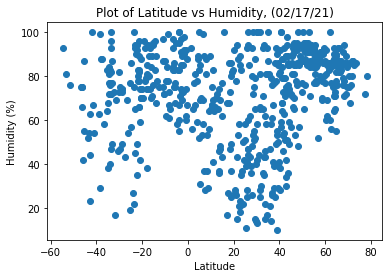

In [20]:
plt.scatter(city_df["Lat"], city_df["Humidity"])
plt.title('Plot of Latitude vs Humidity, (02/17/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print("The scatter plot shows Latitude vs Humidity")

The scatter plot shows Latitude vs Wind Speed


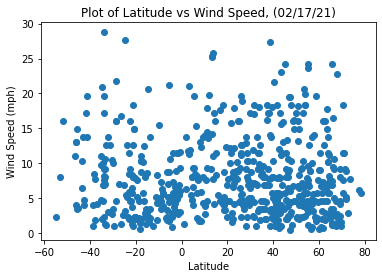

In [21]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"])
plt.title('Plot of Latitude vs Wind Speed, (02/17/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print("The scatter plot shows Latitude vs Wind Speed")

 Linear Regression
 Northern Hemisphere 

In [22]:
#use city_df dataframe
northhemisp=city_df.loc[city_df["Lat"]>0]
northhemisp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Hong Kong,22.2855,114.1577,69.01,58,33,1.99,HK,1613628061
3,Bathsheba,13.2167,-59.5167,77.00,65,20,25.32,BB,1613628065
5,Talnakh,69.4865,88.3972,-18.99,85,100,1.54,RU,1613628065
7,Vardø,70.3705,31.1107,28.40,80,40,18.41,NO,1613628066
8,Clyde River,70.4692,-68.5914,-29.20,75,1,5.75,CA,1613628066
...,...,...,...,...,...,...,...,...,...
596,Lake City,30.1897,-82.6393,59.00,100,90,6.91,US,1613627945
597,Komsomolets,53.7453,62.0708,4.12,93,100,18.34,KZ,1613628141
598,Izhma,65.0083,53.9113,-13.94,86,100,7.63,RU,1613628141
599,Goderich,43.7501,-81.7165,8.60,85,100,3.44,CA,1613628141


Southern Hemisphere Linear Regression

In [23]:
#use city_df dataframe
southhemisp=city_df.loc[city_df["Lat"]<0]
southhemisp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,50.00,93,40,2.30,AR,1613628061
2,Rawson,-43.3002,-65.1023,64.92,54,15,6.40,AR,1613628062
4,Alamor,-4.0181,-80.0197,57.42,100,71,2.89,EC,1613628065
6,Bluff,-46.6000,168.3333,61.00,75,27,11.01,NZ,1613627984
11,Ahipara,-35.1667,173.1667,67.78,64,73,9.78,NZ,1613628067
...,...,...,...,...,...,...,...,...,...
582,Rurrenabaque,-14.4413,-67.5278,72.55,96,99,1.61,BO,1613628139
587,Opuwo,-18.0607,13.8400,72.66,38,15,0.63,NA,1613628139
590,Vao,-22.6667,167.4833,79.77,90,83,16.08,NC,1613628140
594,Baturaja,-4.1333,104.1667,82.02,83,98,5.37,ID,1613628140


The correlation coeficient r for Maximum TEMPERATURE (N) is: -0.8625290309061389
The correlation coeficient r for HUMIDITY (N) is: 0.4004950861342756
The correlation coeficient r for CLOUDINESS (N) is: 0.12901284820234452
The correlation coeficient r for WIND SPEED (N) is: -0.13190056247048748
The correlation coeficient r for Maximum TEMPERATURE (S) is: 0.5032104222049054
The correlation coeficient r for HUMIDITY (S) is: 0.2695114528312993
The correlation coeficient r for CLOUDINESS (S) is: 0.4980497497666353
The correlation coeficient r for WIND SPEED (S) is: -0.23142615690206925


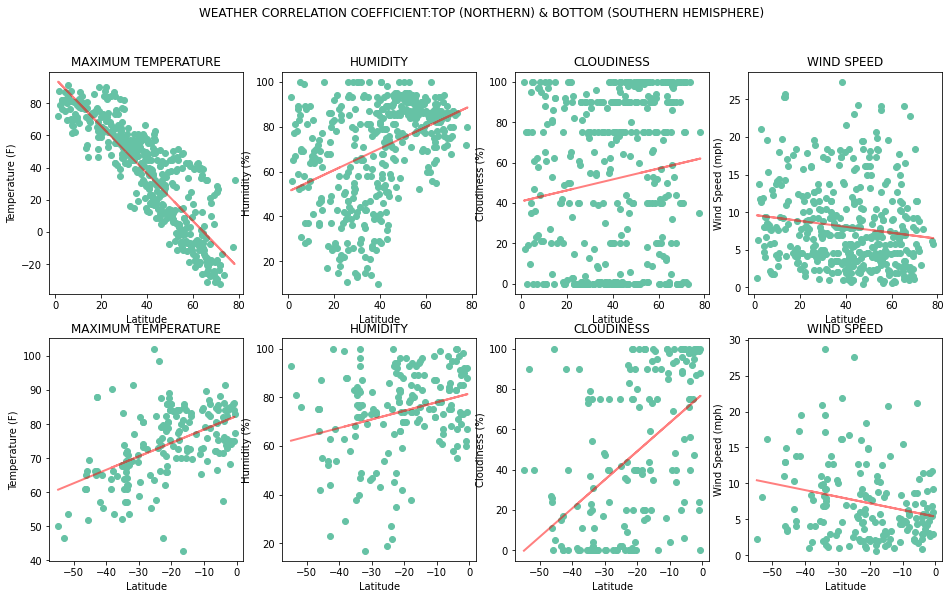

In [24]:
# Run linear regression on each relationship: 
fig,ax = plt.subplots(2,4, figsize=(16,9))
fig.suptitle('WEATHER CORRELATION COEFFICIENT:TOP (NORTHERN) & BOTTOM (SOUTHERN HEMISPHERE)')

#NORTHERN HEMISPHERE:
#Northen Hemisphere- Temperature(F) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Max Temp'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][0].scatter(northhemisp['Lat'], northhemisp['Max Temp'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][0].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][0].title.set_text('MAXIMUM TEMPERATURE')
ax[0][0].set_ylabel('Temperature (F)')
ax[0][0].set_xlabel('Latitude')
print("The correlation coeficient r for Maximum TEMPERATURE (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Max Temp'])[0]))

#Northen Hemisphere- Humidity(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Humidity'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][1].scatter(northhemisp['Lat'], northhemisp['Humidity'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][1].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][1].title.set_text('HUMIDITY')
ax[0][1].set_ylabel('Humidity (%)')
ax[0][1].set_xlabel('Latitude')
print("The correlation coeficient r for HUMIDITY (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Humidity'])[0]))

#Northen Hemisphere- Cloudiness(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Cloudiness'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][2].scatter(northhemisp['Lat'], northhemisp['Cloudiness'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][2].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][2].title.set_text('CLOUDINESS')
ax[0][2].set_ylabel('Cloudiness (%)')
ax[0][2].set_xlabel('Latitude')
print("The correlation coeficient r for CLOUDINESS (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Cloudiness'])[0]))

#Northen Hemisphere- wind Speed(mph) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Wind Speed'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][3].scatter(northhemisp['Lat'], northhemisp['Wind Speed'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][3].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][3].title.set_text('WIND SPEED')
ax[0][3].set_ylabel('Wind Speed (mph)')
ax[0][3].set_xlabel('Latitude')
print("The correlation coeficient r for WIND SPEED (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Wind Speed'])[0]))

#SOUTHERN HEMISPHERE
#Southern Hemisphere - Temperature(F) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Max Temp'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][0].scatter(southhemisp['Lat'], southhemisp['Max Temp'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][0].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][0].title.set_text('MAXIMUM TEMPERATURE')
ax[1][0].set_ylabel('Temperature (F)')
ax[1][0].set_xlabel('Latitude')
print("The correlation coeficient r for Maximum TEMPERATURE (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Max Temp'])[0]))

#Southern Hemisphere - Humidity(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Humidity'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][1].scatter(southhemisp['Lat'], southhemisp['Humidity'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][1].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][1].title.set_text('HUMIDITY')
ax[1][1].set_ylabel('Humidity (%)')
ax[1][1].set_xlabel('Latitude')
print("The correlation coeficient r for HUMIDITY (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Humidity'])[0]))

#Southern Hemisphere - Cloudiness(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Cloudiness'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][2].scatter(southhemisp['Lat'], southhemisp['Cloudiness'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][2].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][2].title.set_text('CLOUDINESS')
ax[1][2].set_ylabel('Cloudiness (%)')
ax[1][2].set_xlabel('Latitude')
print("The correlation coeficient r for CLOUDINESS (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Cloudiness'])[0]))

#Southern Hemisphere - wind Speed(mph) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Wind Speed'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][3].scatter(southhemisp['Lat'], southhemisp['Wind Speed'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][3].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][3].title.set_text('WIND SPEED')
ax[1][3].set_ylabel('Wind Speed (mph)')
ax[1][3].set_xlabel('Latitude')
print("The correlation coeficient r for WIND SPEED (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Wind Speed'])[0]))
